## San Francisco: From (2010) Census Tracts to Neighborhoods
### Team Code & Cry

In order to more effectively analyze and compare our different data sets - much of which was collected at the census tract level - we have decided to work at the neighborhood level, as this is a more accessible scale for storytelling and visualizations. In order to do so, we used the [Analysis Neighborhoods data set](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods-2010-census-tracts-assigned/bwbp-wk3r) from DataSF to group census tracts by neighborhood. These neighborhood boundaries and their respective census tracts were created by the Department of Public Health and the Mayor's Office of Housing & Community Development, with support from the Planning Department. 

This data set included 41 neighborhoods comprised of 2010 census tracts, using common real estate and residents’ definitions for the purpose of providing consistency in the analysis and reporting of socio-economic, demographic, and environmental data. Note that these so-called 'analysis neighborhoods' are not codified in Planning Code nor Administrative Code, but they provide a consistent and shared definition of neighborhood boundaries throughout the entirety of our project. Let's check it out!

### Analysis Neighborhoods

In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [3]:
#pull in the Analysis Neighborhoods data set from DataSF
ct = gpd.read_file('data/SF2010_Neighborhoods_CTs.geojson')

In [4]:
ct.shape

(195, 6)

Looks like there are 195 census tracts in this file, all of which are assigned to one of the 41 neighborhoods identified in this data set. Let's dig a bit deeper and see what the data looks like, and what neighborhoods and census tracts are showing up within it: 

In [5]:
ct.head()

,shape_area,nhood,tractce10,geoid,shape_len,geometry
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341..."
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234..."
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244..."
3,3364564.73418,Japantown,015500,06075015500,12144.0167608,"MULTIPOLYGON (((-122.42469 37.78534, -122.4249..."
4,2515362.5151,Pacific Heights,015300,06075015300,6918.26802571,"MULTIPOLYGON (((-122.43492 37.78588, -122.4365..."


Great, this is the exact data we need in order to classify our other datasets by neighborhood, rather tahn census tract. Let's clean this data set up a bit, though, by renaming some columns: 

In [6]:
#renaming the six columns
ct.columns = ['Shape Area',
              'Neighborhood', 
              'Census Tract',
              'FIPS',
              'Shape Length',
              'Geometry',]

In [7]:
#checking that the above function worked
ct.head()

,Shape Area,Neighborhood,Census Tract,FIPS,Shape Length,Geometry
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341..."
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234..."
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244..."
3,3364564.73418,Japantown,015500,06075015500,12144.0167608,"MULTIPOLYGON (((-122.42469 37.78534, -122.4249..."
4,2515362.5151,Pacific Heights,015300,06075015300,6918.26802571,"MULTIPOLYGON (((-122.43492 37.78588, -122.4365..."


Perfect, now that our data is cleaned up a bit, let's see if we can learn more about the breakdown of how many census tracts are assigned to each neighborhood: 

In [9]:
# getting a count on how many census tracts are in each of the 41 identified neighborhoods
ct['Neighborhood'].value_counts()

Sunset/Parkside                   14
Mission                           13
Bayview Hunters Point             11
Outer Richmond                    10
Excelsior                          8
Tenderloin                         8
Pacific Heights                    7
Marina                             7
Nob Hill                           7
West of Twin Peaks                 7
Inner Sunset                       6
Noe Valley                         6
Castro/Upper Market                6
Western Addition                   6
Bernal Heights                     6
Oceanview/Merced/Ingleside         5
Visitacion Valley                  5
Hayes Valley                       5
Inner Richmond                     4
Haight Ashbury                     4
Portola                            4
Lakeshore                          4
South of Market                    4
Potrero Hill                       4
Chinatown                          4
Russian Hill                       4
North Beach                        3
O

In [35]:
#quick stats on the neighborhood column
ct['Neighborhood'].describe()

count                 195
unique                 41
top       Sunset/Parkside
freq                   14
Name: Neighborhood, dtype: object

This is really interesting to see, and makes me excited to further visualize and map these neighborhoods. 
Next, we'll need to join this Analysis Neighborhoods data with our 2010 census tract spatial data. Then, we can finally begin the actual mapping and merging with other data in the notebooks that follow. 

### Merging Analysis Neighborhoods with 2010 Census Tracts

In [10]:
import geopandas as gpd

In [11]:
# bring in the geojson file with census tracts
tracts=gpd.read_file('data/2010CTs.geojson')
# see what the data looks like
tracts.head()

,statefp10,mtfcc10,name10,intptlat10,awater10,namelsad10,funcstat10,aland10,geoid10,tractce10,intptlon10,countyfp10,geometry
0,06,G5020,165,+37.7741958,0,Census Tract 165,S,370459,06075016500,016500,-122.4477884,075,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447..."
1,06,G5020,164,+37.7750995,0,Census Tract 164,S,309097,06075016400,016400,-122.4369729,075,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398..."
2,06,G5020,163,+37.7760456,0,Census Tract 163,S,245867,06075016300,016300,-122.4295509,075,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289..."
3,06,G5020,161,+37.7799831,0,Census Tract 161,S,368901,06075016100,016100,-122.4286631,075,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291..."
4,06,G5020,160,+37.7823363,0,Census Tract 160,S,158236,06075016000,016000,-122.4224838,075,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203..."


In [12]:
#seeing how many rows and columns we're working with 
tracts.shape

(197, 13)

The analysis neighborhoods data set included 195 census tracts, so this is almost an exact match. Still, let's pull a bit more info on this data set before merging: 

In [13]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp10   197 non-null    object  
 1   mtfcc10     197 non-null    object  
 2   name10      197 non-null    object  
 3   intptlat10  197 non-null    object  
 4   awater10    197 non-null    object  
 5   namelsad10  197 non-null    object  
 6   funcstat10  197 non-null    object  
 7   aland10     197 non-null    object  
 8   geoid10     197 non-null    object  
 9   tractce10   197 non-null    object  
 10  intptlon10  197 non-null    object  
 11  countyfp10  197 non-null    object  
 12  geometry    197 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 20.1+ KB


Looking at this list of columns, we really only need the census tract number (tractce10) and geometry columns in order to merge the two data sets. Let's move forward with doing so: 

In [14]:
tracts = tracts[['tractce10','geometry']]
tracts.head()

,tractce10,geometry
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447..."
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398..."
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289..."
3,016100,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291..."
4,016000,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203..."


We have the census tract number, but we need a full FIPS code in order to merge with other data. 

We'll go ahead and add '06' for the state of California and '075' for the county of San Francisco to the census tract number as follows: 

In [15]:
# create a FIPS column before merging
tracts['FIPS'] ='06' + '075' + tracts['tractce10']

In [16]:
# double check that we have a new and complete FIPS code column
tracts.head()

,tractce10,geometry,FIPS
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300
3,016100,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291...",06075016100
4,016000,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203...",06075016000


Perfect, that worked! Now we merge on FIPS as follows: 

In [17]:
# create a new dataframe based on the join, tracts is spatial data so must come first
nhoods=tracts.merge(ct,on="FIPS")

In [18]:
nhoods.head(5)

,tractce10,geometry,FIPS,Shape Area,Neighborhood,Census Tract,Shape Length,Geometry
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500,3986994.21363,Lone Mountain/USF,016500,9798.02524207,"MULTIPOLYGON (((-122.44092 37.77363, -122.4425..."
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400,3326589.16121,Hayes Valley,016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341..."
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300,2646081.50418,Hayes Valley,016300,6603.94140199,"MULTIPOLYGON (((-122.42589 37.77460, -122.4275..."
3,016100,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291...",06075016100,3970258.84056,Western Addition,016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234..."
4,016000,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203...",06075016000,1702990.14508,Western Addition,016000,5942.83554773,"MULTIPOLYGON (((-122.42119 37.78475, -122.4212..."


In [19]:
# define the columns to keep, which include: geometry, FIPS and Neighborhood
columns_to_keep = ['geometry',
                   'FIPS',
                   'Neighborhood']

In [20]:
# copy and create a new function, nhoods2, that just displays the defined columns to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,geometry,FIPS,Neighborhood
0,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500,Lone Mountain/USF
1,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400,Hayes Valley
2,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300,Hayes Valley
3,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291...",06075016100,Western Addition
4,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203...",06075016000,Western Addition
...,...,...,...
190,"MULTIPOLYGON (((-122.40716 37.77974, -122.4076...",06075017601,South of Market
191,"MULTIPOLYGON (((-122.44257 37.76593, -122.4423...",06075017000,Castro/Upper Market
192,"MULTIPOLYGON (((-122.42695 37.76917, -122.4274...",06075016900,Castro/Upper Market
193,"MULTIPOLYGON (((-122.43930 37.76817, -122.4401...",06075016700,Haight Ashbury


This is exactly what we need in order to start mapping census tracts by neighborhood! 

In the next section, we'll experiment with a few different types of static and interactive mapping techniques that will inform how we visualize our data throughout the rest of our project.  

### Mapping & Visualizations

<AxesSubplot: >

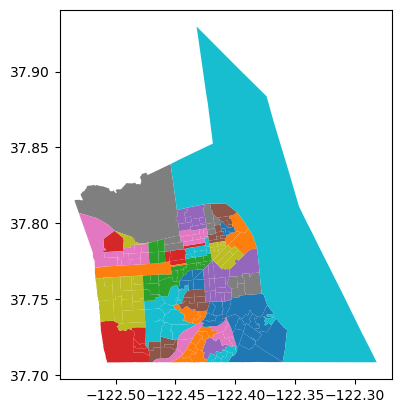

In [22]:
#simple plot map with random colors, corresponding to different neighborhoods
nhoods.plot(column='Neighborhood')

(-122.5467034, -122.2691646, 37.69699805, 37.940910949999996)

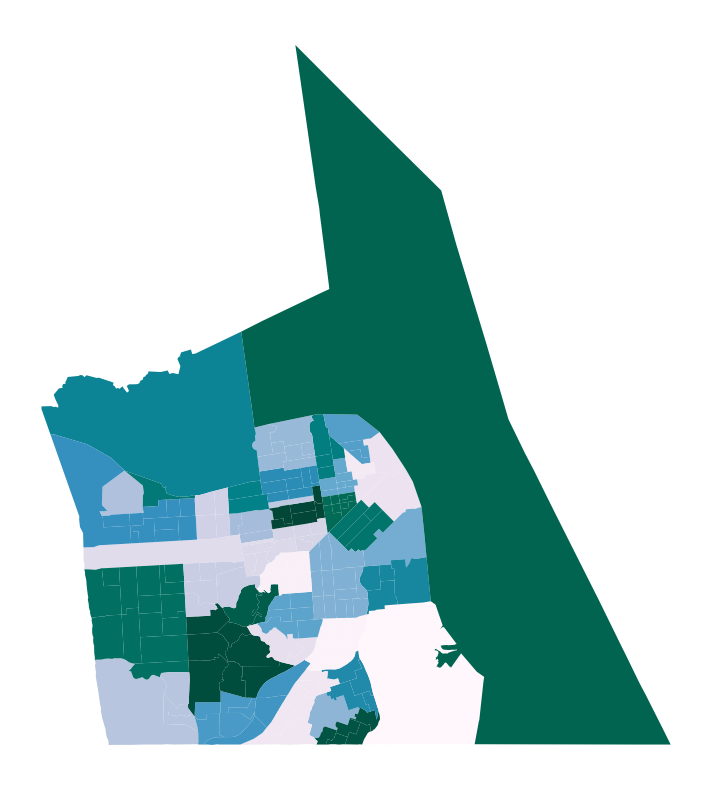

In [23]:
# a slightly more advanced and visually appealing map with its axis turned off and a more defined figure size
ax1 = nhoods2.plot(
        column='Neighborhood', 
        figsize=(12,10),
        cmap='PuBuGn',
        )
ax1.axis('off')

In [24]:
# importing 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'San Francisco Neighborhoods by Census Tract (2010)')

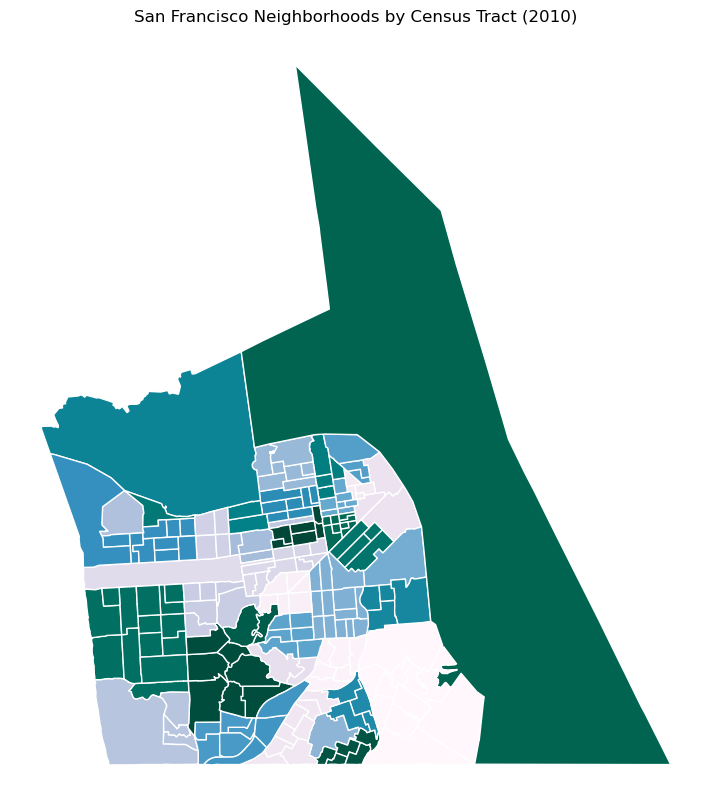

In [25]:
# Making another non-interactive figure with axis turned off and a new title at the top
fig, ax = plt.subplots(figsize = (12,10)) 
nhoods2.plot(column = 'Neighborhood',legend=False,
  edgecolor='white',cmap = 'PuBuGn',ax=ax)
ax.axis('off')
plt.title('San Francisco Neighborhoods by Census Tract (2010)')

In [26]:
# trying out a new interactive map! 
# as you hover over each census tract, a pop-up shows the neighborhood that corresponds to the exact FIPS code
nhoods2.explore()

In [27]:
# making the interactive map a bit prettier and easier to interpret (with a legend)
nhoods2.explore(
     column="Neighborhood", # make choropleth based on "BoroName" column
     tooltip="Neighborhood", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Set2", # use "Set1" matplotlib colormap
     style_kwds=dict(color="white") # use black outline
    )